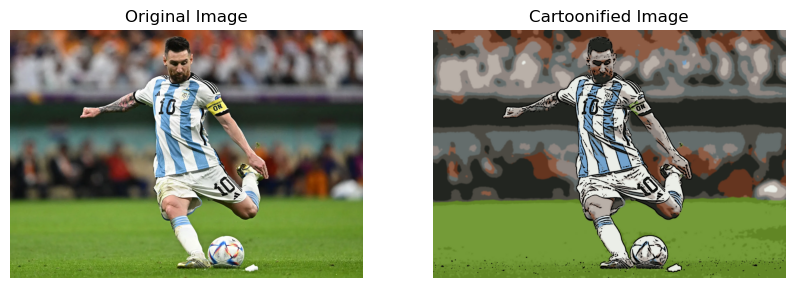

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('LM10.webp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

# Color quantization
def color_quantization(image, k=11):
    data = np.float32(image).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    result = centers[labels.flatten()]
    result = result.reshape(image.shape)
    return result

# Apply color quantization
quantized_image = color_quantization(image_rgb, k=11)

# Combine edges with the quantized image
blurred = cv2.bilateralFilter(quantized_image, d=9, sigmaColor=300, sigmaSpace=300)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

# Display the original and cartoon images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cartoonified Image")
plt.imshow(cartoon)
plt.axis('off')

plt.show()